In [1]:
import pandas as pd
import numpy as np
import spotipy
import SpotipyWrapper


In [2]:
help(SpotipyWrapper)

Help on module SpotipyWrapper:

NAME
    SpotipyWrapper

CLASSES
    builtins.object
        WrapperClass
    
    class WrapperClass(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  doAuth(self)
     |      Funtion: Setup and initialization of credentials manager and 
     |      master Spotify object
     |      
     |      Returns: Spotify Object
     |  
     |  getSongsFromPlaylist(self, uri, username, name='')
     |      Function: Get list of songs from certain playlist
     |      
     |      Returns: Dataframe containing [song name, uri]
     |  
     |  getUsersPlaylists(self, username='mikeydays')
     |      Function: Get a list of users playlist names
     |      
     |      Returns: A list of names
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__


In [3]:
wrapper = SpotipyWrapper.WrapperClass()
sp = wrapper.doAuth()

In [4]:

playlistDF = wrapper.getUsersPlaylists('mikeydays')
playlistDF


,name,uri
0,wholesome bangers,52Z4shkqqeHL1AzX1NUgzY
1,Throwback Dingers,6v3WpQVrQbgfpU2EVxm3eW
2,eminem,2Zfrz2ddkRw64NSG3nRsf3
3,not country,3EaIcfySntnbcOWrBAnb96
4,country,0ZB9jG1uyCbs4rnQ1V5ro6


In [5]:
artistsDF = pd.read_csv('artist-uris.csv')
artistsDF.columns=['name', 'uri']
artistsDF['uri'] = artistsDF['uri'].apply(lambda uri: uri.split(':')[2])

artistsDF

,name,uri
0,2:00 AM,4tN3rZ7cChj4Wns2Wt2Nj6
1,2:15,4HsOm6VNKZtGh8W8GhdNu4
2,2:54,3LsQKoRgMc8VEkQn66jfAQ
3,4:20,5KCG0FDMDPzQpxcohGUnyH
4,6:30,5abblGojcZoe3zZBhJFBUi
...,...,...
81317,黃曉明,53F8atvCmVFVOvnKwZXBd3
81318,黃玠瑋,6VI0p0xTjBKKxQN8i8vGpD
81319,黃義達,7kaq0LysuRSgBZSorlZ7Vj
81320,黃顯忠 (Huang Xianzhong),7MuuEryyseo5cvReO6gdPF


In [6]:
uri = playlistDF[playlistDF['name'] == 'country']['uri'].values[0]

songsDF = wrapper.getSongsFromPlaylist(uri, 'mikeydays')
songsDF

,name,uri,genres
0,One Big Country Song,28uL97M3whSL1UWqr7hsNh,"[contemporary country, country pop, country ra..."
1,Just the Way,5PAvFGse5jjDH9ke8Mae7D,"[contemporary country, country, country pop, c..."
2,Lil Bit,0NmuYnjETG3u3qx0OmEJev,"[dance pop, hip hop, pop rap, rap, southern hi..."
3,Should've Been A Cowboy,18BajNiyvH6GpYshB0unrm,"[contemporary country, country, country road, ..."
4,Chicken Fried,3eBnEo9WL34ulBCZlLpUQO,"[contemporary country, country, country road, ..."
...,...,...,...
380,Gone,7IhfjcaXuXCq20ZiAA7igK,"[contemporary country, country, country road]"
381,Holler Back,3Q39dywbYuBZmQ7sW8sc95,"[country, country road, modern country rock]"
382,"Wine, Beer, Whiskey",5avVDmK9FVJpd3MDO8I3Zl,"[contemporary country, country, country dawn, ..."
383,Tequila Makes Her Clothes Fall Off,6IC6VhpV7D8T1t037Atqpu,"[arkansas country, contemporary country, count..."


In [7]:
id = artistsDF.loc[artistsDF['name'] == 'DaBaby']['uri'].values[0]

sp.artist_top_tracks(id)

//api.spotify.com/v1/artists/4r63FhuTkUYltbVAg5TQnk',
      'id': '4r63FhuTkUYltbVAg5TQnk',
      'name': 'DaBaby',
      'type': 'artist',
      'uri': 'spotify:artist:4r63FhuTkUYltbVAg5TQnk'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/623PL2MBg50Br5dLXC9E9e'},
    'href': 'https://api.spotify.com/v1/albums/623PL2MBg50Br5dLXC9E9e',
    'id': '623PL2MBg50Br5dLXC9E9e',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b27320e08c8cc23f404d723b5647',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e0220e08c8cc23f404d723b5647',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d0000485120e08c8cc23f404d723b5647',
      'width': 64}],
    'name': 'BLAME IT ON BABY',
    'release_date': '2020-04-17',
    'release_date_precision': 'day',
    'total_tracks': 13,
    'type': 'album',
    'uri': 'spotify:album:623PL2MBg50Br5dLXC9E9e'},
   'artists': [{'external_u

In [8]:
names = []

featureList = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
valence = []
popularity = []
timeSignature = []

for index, row in songsDF.iloc[:].iterrows():
    uri = row['uri']
    name = row['name']
    features = sp.audio_features(uri)
    if features != [None]:
        names.append(name)

        acousticness.append(features[0]['acousticness'])
        danceability.append(features[0]['danceability'])
        energy.append(features[0]['energy'])
        instrumentalness.append(features[0]['instrumentalness'])
        liveness.append(features[0]['liveness'])
        loudness.append(features[0]['loudness'])
        speechiness.append(features[0]['speechiness'])
        tempo.append(features[0]['tempo'])
        valence.append(features[0]['valence'])
        timeSignature.append(features[0]['time_signature'])



        # popularity.append(features[0]['popularity'])

data = {
    'name' : names,
    'acousticness' : acousticness,
    'danceability' : danceability,
    'energy' : energy,
    'instrumentalness' : instrumentalness,
    'liveness' : liveness,
    'loudness' : loudness,
    'speechiness' : speechiness,
    'tempo' : tempo,
    'valence' : valence,
    'timeSignature' : timeSignature
    
}

audioFeaturesDF = pd.DataFrame(data)
audioFeaturesDF


,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,One Big Country Song,0.60200,0.547,0.822,0.000000,0.1070,-2.850,0.0334,81.981,0.553,4
1,Just the Way,0.10700,0.426,0.829,0.000000,0.3170,-2.840,0.0569,180.241,0.814,4
2,Lil Bit,0.02550,0.707,0.689,0.000000,0.3830,-7.097,0.0387,119.987,0.410,4
3,Should've Been A Cowboy,0.35100,0.585,0.793,0.000000,0.3000,-3.713,0.0322,133.839,0.732,4
4,Chicken Fried,0.64500,0.566,0.713,0.000000,0.1140,-4.250,0.0417,169.864,0.807,4
...,...,...,...,...,...,...,...,...,...,...,...
380,Gone,0.00985,0.521,0.746,0.000000,0.0741,-6.173,0.0351,149.977,0.473,4
381,Holler Back,0.25900,0.442,0.921,0.000000,0.1630,-2.344,0.0635,178.124,0.601,4
382,"Wine, Beer, Whiskey",0.61700,0.727,0.914,0.000000,0.5960,-5.850,0.0743,106.021,0.784,4
383,Tequila Makes Her Clothes Fall Off,0.12900,0.664,0.706,0.000001,0.0857,-7.045,0.0270,93.968,0.681,4


In [16]:
import os

username = 'mikeydays'
playlist = 'country'

path = './Data/{}/{}'.format(username, playlist)

if not os.path.exists(path):
    os.makedirs(path)

csvPath = os.path.join(path, 'SongFeatures.csv')    
audioFeaturesDF.to_csv(csvPath, index=False)
# audioFeaturesDF.to_csv(r'./{}/{}/SongFeatures.csv'.format('mikeydays', 'country'))

In [17]:
audioFeaturesDF = pd.read_csv(csvPath)

In [18]:
audioFeaturesDF.corr(method='kendall')

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
acousticness,1.000000,-0.050662,-0.262084,0.033160,0.136156,-0.152149,-0.034484,0.121238,-0.094958,-0.275195
danceability,-0.050662,1.000000,-0.008523,0.041789,-0.006953,-0.193566,0.062353,-0.382209,0.278934,0.221910
energy,-0.262084,-0.008523,1.000000,-0.176729,0.100974,0.483520,0.249419,0.166823,0.249991,0.020339
instrumentalness,0.033160,0.041789,-0.176729,1.000000,-0.042380,-0.234747,-0.099632,-0.101474,-0.000051,-0.243199
liveness,0.136156,-0.006953,0.100974,-0.042380,1.000000,0.005869,0.019231,0.115656,-0.116733,-0.213150
loudness,-0.152149,-0.193566,0.483520,-0.234747,0.005869,1.000000,-0.029521,0.166418,0.033339,0.032104
speechiness,-0.034484,0.062353,0.249419,-0.099632,0.019231,-0.029521,1.000000,0.155213,0.147813,-0.091230
tempo,0.121238,-0.382209,0.166823,-0.101474,0.115656,0.166418,0.155213,1.000000,-0.136134,-0.386246
valence,-0.094958,0.278934,0.249991,-0.000051,-0.116733,0.033339,0.147813,-0.136134,1.000000,0.158324
timeSignature,-0.275195,0.221910,0.020339,-0.243199,-0.213150,0.032104,-0.091230,-0.386246,0.158324,1.000000


In [19]:
import altair as alt

source = pd.DataFrame(audioFeaturesDF.drop(columns=['timeSignature', 'tempo', 'loudness']))
source = pd.DataFrame(source.mean(axis=0), columns=['Mean']).reset_index()
alt.Chart(source).mark_bar().encode(x='index', y='Mean')
# source

alt.Chart(...)

In [13]:
audioFeaturesDF

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,One Big Country Song,0.60200,0.547,0.822,0.000000,0.1070,-2.850,0.0334,81.981,0.553,4
1,Just the Way,0.10700,0.426,0.829,0.000000,0.3170,-2.840,0.0569,180.241,0.814,4
2,Lil Bit,0.02550,0.707,0.689,0.000000,0.3830,-7.097,0.0387,119.987,0.410,4
3,Should've Been A Cowboy,0.35100,0.585,0.793,0.000000,0.3000,-3.713,0.0322,133.839,0.732,4
4,Chicken Fried,0.64500,0.566,0.713,0.000000,0.1140,-4.250,0.0417,169.864,0.807,4
...,...,...,...,...,...,...,...,...,...,...,...
380,Gone,0.00985,0.521,0.746,0.000000,0.0741,-6.173,0.0351,149.977,0.473,4
381,Holler Back,0.25900,0.442,0.921,0.000000,0.1630,-2.344,0.0635,178.124,0.601,4
382,"Wine, Beer, Whiskey",0.61700,0.727,0.914,0.000000,0.5960,-5.850,0.0743,106.021,0.784,4
383,Tequila Makes Her Clothes Fall Off,0.12900,0.664,0.706,0.000001,0.0857,-7.045,0.0270,93.968,0.681,4


In [14]:
playlist = wrapper.getUsersPlaylists('mikeydays')
playlist

,name,uri
0,wholesome bangers,52Z4shkqqeHL1AzX1NUgzY
1,Throwback Dingers,6v3WpQVrQbgfpU2EVxm3eW
2,eminem,2Zfrz2ddkRw64NSG3nRsf3
3,not country,3EaIcfySntnbcOWrBAnb96
4,country,0ZB9jG1uyCbs4rnQ1V5ro6


In [293]:
songs = wrapper.getSongsFromPlaylist("52Z4shkqqeHL1AzX1NUgzY", "mikeydays")
songs["uri"].iloc[0]
songs
    


'4VywXu6umkIQ2OS0m1I79y'

In [22]:
import matplotlib.pyplot as plt
# temp  =

In [56]:
audioFeaturesDF

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
...,...,...,...,...,...,...,...,...,...,...,...
380,Is Anybody Loving You These Days,0.06610,0.699,0.573,0.000005,0.2290,-8.773,0.0276,119.908,0.618,4
381,Country Folks - Livin' Loud,0.23000,0.527,0.841,0.000000,0.0912,-2.854,0.0505,79.927,0.762,4
382,"Wine, Beer, Whiskey",0.61700,0.727,0.914,0.000000,0.5960,-5.850,0.0743,106.021,0.784,4
383,Home Run,0.04350,0.600,0.745,0.000000,0.3620,-5.677,0.0315,104.023,0.424,4


In [217]:
temp

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
5,0.30200,0.603,0.625,0.000000,0.1410,-6.563,0.0258,96.020,0.651,4
6,0.25300,0.587,0.855,0.000000,0.3130,-4.893,0.0733,168.016,0.599,4
7,0.02750,0.616,0.728,0.000000,0.2280,-4.020,0.0278,111.934,0.375,4
8,0.13400,0.613,0.564,0.000002,0.0585,-7.085,0.0251,78.388,0.538,4
9,0.15200,0.758,0.867,0.000000,0.3080,-5.087,0.0475,102.018,0.964,4


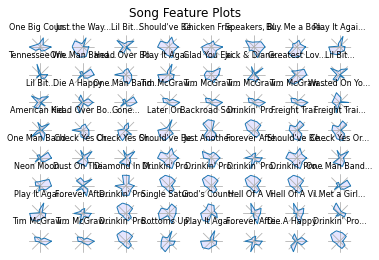

In [24]:
import matplotlib.pyplot as plt
import math
# matplotlib.use('TkAgg')
%matplotlib inline


def create_spider(df, x, y, ax, subs, final = False):
    # Libraries
    
    # number of variable
    temp = df.drop(["name"], axis=1)
    normalized_df=temp.rank(pct = True)
    categories= list(normalized_df)
    N = len(categories)
    
    lenRow = subs
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:

    ax.set_title(str(df['name'].iloc[x * lenRow + y][:12]) + '...', fontsize=8)
    values= normalized_df.iloc[x * lenRow + y].values.flatten().tolist()
    values += values[:1]
    values
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
 
   
    
    # Draw one axe per variable + add labels
    if final:
        ax.set_title(df['name'].iloc[x * lenRow + y],fontsize=16)
        plt.xticks(angles[:-1], categories, color='Black', size=10)
        
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # ax.set_ylim([0,1])
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    return plt


def spiders(df, subs):
    # Initialise the spider plot
    temp = df.drop(["name"], axis=1)
    normalized_df=temp.rank(pct = True)
    categories= list(normalized_df)
    N = len(categories)

    fig, axes = plt.subplots(subs, subs, subplot_kw=dict(polar=True))
    fig.suptitle("Song Feature Plots")


    x = y = 0
    
    for axisRow in axes:
        for ax in axisRow:  
            ax.set_title(temp.iloc[x,y])    
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.yaxis.grid(False)
            ax.spines['polar'].set_visible(False)
            create_spider(df, x, y,ax, subs)
            
        
        
            y += 1  
            y = y%subs
        x += 1
        x %= subs

    plt.savefig('spiderPlots.png')
    plt.subplots_adjust(wspace = .2, hspace = .2)
    # fig.tight_layout()

    # new_ax = plt.subplot(111, polar=True)

    # create_spider(df, 0, 0, new_ax, True).show()

spiders(audioFeaturesDF[:69], 8)


In [265]:
audioFeaturesDF

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
5,"Speakers, Bleachers And Preachers",0.30200,0.603,0.625,0.000000,0.1410,-6.563,0.0258,96.020,0.651,4
6,Power of Positive Drinkin',0.25300,0.587,0.855,0.000000,0.3130,-4.893,0.0733,168.016,0.599,4
7,I Don't Want This Night To End,0.02750,0.616,0.728,0.000000,0.2280,-4.020,0.0278,111.934,0.375,4
8,Broken Halos,0.13400,0.613,0.564,0.000002,0.0585,-7.085,0.0251,78.388,0.538,4
9,Hotel Key,0.15200,0.758,0.867,0.000000,0.3080,-5.087,0.0475,102.018,0.964,4


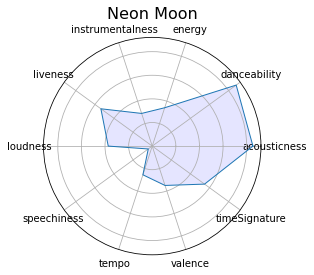

In [28]:



new_ax = plt.subplot(111, polar=True)
new_ax.set_yticklabels([])
create_spider(audioFeaturesDF[:], 5, 0, new_ax, 8, True).show()


In [94]:
audioFeaturesDF = audioFeaturesDF.iloc[:20]
audioFeaturesDF

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,timeSignature
0,I Love This Life,0.01640,0.586,0.927,0.000007,0.1530,-3.014,0.0547,111.977,0.549,4
1,Sunday Morning,0.00733,0.584,0.716,0.000000,0.0879,-4.737,0.0342,90.005,0.525,4
2,Sun Daze,0.09810,0.476,0.952,0.000003,0.4380,-3.783,0.0410,170.062,0.849,4
3,"Courtesy Of The Red, White And Blue (The Angry...",0.52100,0.424,0.661,0.000002,0.0719,-5.547,0.0425,111.762,0.384,4
4,Loving You Easy,0.01250,0.717,0.591,0.000000,0.0691,-3.939,0.0267,99.003,0.388,4
5,"Speakers, Bleachers And Preachers",0.30200,0.603,0.625,0.000000,0.1410,-6.563,0.0258,96.020,0.651,4
6,Power of Positive Drinkin',0.25300,0.587,0.855,0.000000,0.3130,-4.893,0.0733,168.016,0.599,4
7,I Don't Want This Night To End,0.02750,0.616,0.728,0.000000,0.2280,-4.020,0.0278,111.934,0.375,4
8,Broken Halos,0.13400,0.613,0.564,0.000002,0.0585,-7.085,0.0251,78.388,0.538,4
9,Hotel Key,0.15200,0.758,0.867,0.000000,0.3080,-5.087,0.0475,102.018,0.964,4


In [98]:

x = math.floor(len(audioFeaturesDF)**.5)
y = math.ceil(len(audioFeaturesDF)**.5)
fig = plt.figure()

# fig, axs = plt.subplots(x, y, constrained_layout=True)
for i in range(x):
    for j in range(y):
        if i+j>=len(audioFeaturesDF):
            break
        axs[i,j].set_title(audioFeaturesDF.iloc[i+j]["name"])
        axs[i,j] = create_spider(audioFeaturesDF, i+j)
        fig.show()
        break
        

ipykernel_launcher:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

In [47]:
w = SpotipyWrapper.WrapperClass()
sp = wrapper.doAuth()
# w.sp.user("mikeydays")
w.sp.current_user()

HTTP Error for GET to https://api.spotify.com/v1/me/ returned 401 due to Unauthorized.


SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/me/:
 Unauthorized., reason: None